# Breast Cancer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot:>

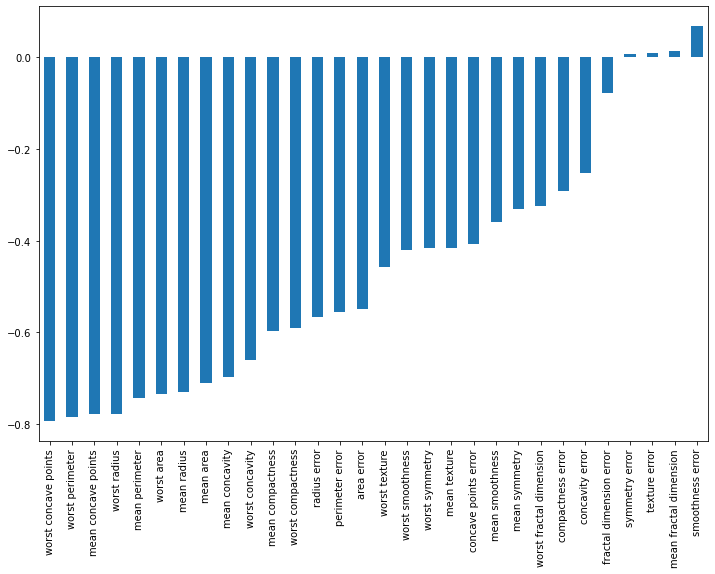

In [21]:
plt.figure(figsize=(12,8))
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

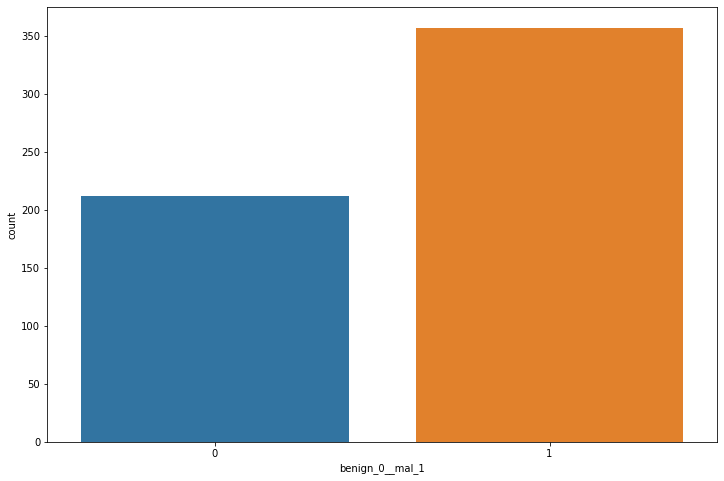

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='benign_0__mal_1', data=data)

<AxesSubplot:>

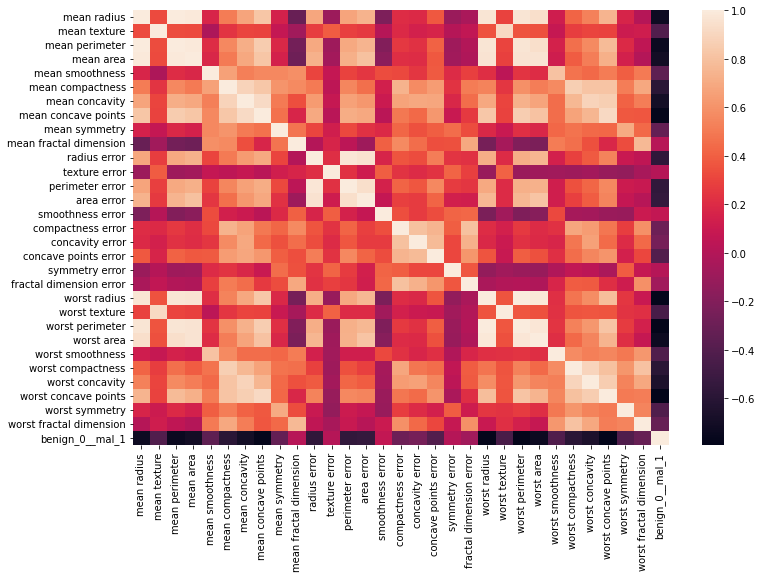

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [41]:
X_train.shape

(426, 30)

In [42]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Binary classification => we use sigmioid for the last layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6637 - val_loss: 0.6314
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6045 - val_loss: 0.5811
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5518 - val_loss: 0.5234
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4968 - val_loss: 0.4646
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4414 - val_loss: 0.4021
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3870 - val_loss: 0.3517
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3382 - val_loss: 0.3054
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3016 - val_loss: 0.2704
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2721 - val_loss: 0.2421
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2482 - val_loss: 0.2208
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.1071
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.1082
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.1029
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0483 - val_loss: 0.1165
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.1077
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0471 - val_loss: 0.1033
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0490 - val_loss: 0.1094
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1184
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0479 - val_loss: 0.1154
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.1081
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1426
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.1515
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1487
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1378
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.1490
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.1552
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.1471
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.1427
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1451
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.1328
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1859
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.2390
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1818
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.2114
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.2158
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.2091
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.2135
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.2021
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.2189
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.2085
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.3101
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2782
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.3128
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.2465
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.4086
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.2484
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.3402
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.2649
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.3624
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.2852
Epoc

in ye mesal bara ye overe fitting hast

In [44]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

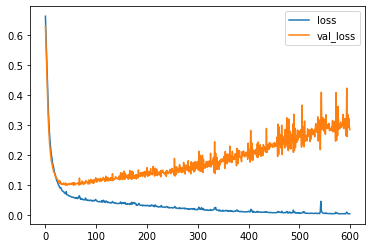

In [45]:
losses.plot()

In [55]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Binary classification => we use sigmioid for the last layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
#help(EarlyStopping)

In [58]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [59]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6958 - val_loss: 0.6827
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6708 - val_loss: 0.6620
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6492 - val_loss: 0.6391
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6267 - val_loss: 0.6158
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6012 - val_loss: 0.5880
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5708 - val_loss: 0.5536
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5327 - val_loss: 0.5151
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4923 - val_loss: 0.4700
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4484 - val_loss: 0.4234
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4038 - val_loss: 0.3772
Epoch 11/

In [60]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

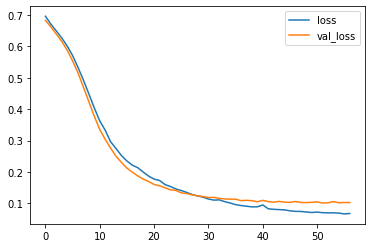

In [61]:
losses.plot()

bbin age khat narenjie falat bemoone o nare bala ham okeye, chizie ke ma mikhaim

ama chizi ke nemikhaim ine ke khat narenjie bere bala

In [74]:
from tensorflow.keras.layers import Dropout

dropout miad random moqe train kardan neuron ha ro khamush mikone, ye adad beine 0 o 1e ke vaqti sefr bezari yaani hich kodomesh khamush nashan moqe train kardan, vaqti yek bezari yaani hamash khamush beshe

In [93]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Binary classification => we use sigmioid for the last layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [94]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [95]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6968 - val_loss: 0.6781
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6854 - val_loss: 0.6638
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6829 - val_loss: 0.6572
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6567 - val_loss: 0.6433
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6478 - val_loss: 0.6264
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6306 - val_loss: 0.6079
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6084 - val_loss: 0.5850
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6088 - val_loss: 0.5686
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5855 - val_loss: 0.5452
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5541 - val_loss: 0.5193
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1196 - val_loss: 0.0979
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0943 - val_loss: 0.0809
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1144 - val_loss: 0.0776
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.0789
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1214 - val_loss: 0.0848
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0914 - val_loss: 0.0921
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.0839
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0998 - val_loss: 0.0789
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0987 - val_loss: 0.0755
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.0830
Epoch 93/600


In [96]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

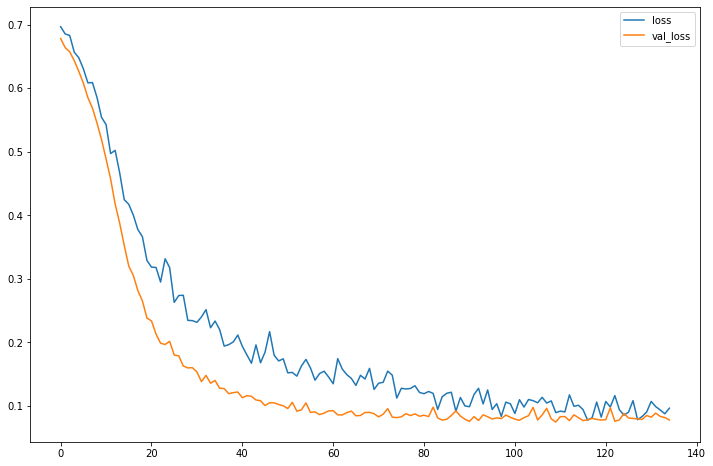

In [97]:
model_loss.plot(figsize=(12,8))

In [98]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 750us/step


In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 0 88]]


In [101]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

